## Spectral Clustering

- 객체간의 거리를 통해 만들어낸 adjuncency_matrix(인접행렬)을 사용하여 군집화를 진행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

In [2]:
df = pd.read_csv('tmp_data.csv')
df.rename(columns={'Unnamed: 0':'동이름'},inplace=True)
df

,동이름,A,B,C,D
0,사직동,0.756808,0.837151,0.367741,0.856218
1,삼청동,0.827742,0.304679,0.923518,0.000679
2,부암동,0.568917,0.924518,0.056251,0.260088
3,평창동,0.580705,0.584580,0.844815,0.060866
4,무악동,0.139818,0.303443,0.598331,0.312935
...,...,...,...,...,...
421,성내3동,0.080882,0.473552,0.109079,0.319963
422,둔촌1동,0.879560,0.419096,0.563044,0.629431
423,둔촌2동,0.984323,0.984479,0.826605,0.679809
424,상일1동,0.479461,0.830551,0.686072,0.301943


In [3]:
df_idx = df['동이름']

In [4]:
del(df['동이름'])

(array([50., 52., 49., 38., 38., 50., 33., 34., 33., 49.]),
 array([6.78525775e-04, 1.00374252e-01, 2.00069979e-01, 2.99765706e-01,
        3.99461433e-01, 4.99157159e-01, 5.98852886e-01, 6.98548613e-01,
        7.98244339e-01, 8.97940066e-01, 9.97635793e-01]),
 <BarContainer object of 10 artists>)

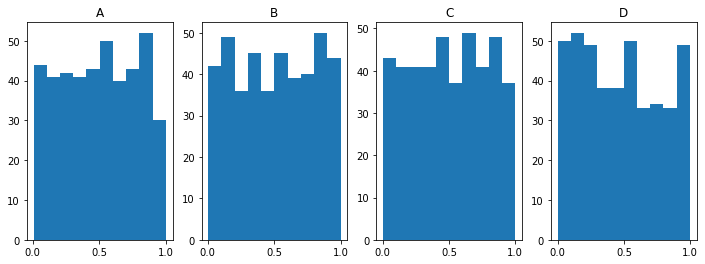

In [5]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(figsize=(12,4),nrows=1, ncols=4)

ax1.set_title('A')
ax1.hist(df['A'])

ax2.set_title('B')
ax2.hist(df['B'])

ax3.set_title('C')
ax3.hist(df['C'])

ax4.set_title('D')
ax4.hist(df['D'])

In [6]:
data = df.values.tolist()

In [10]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=10, n_init=3, random_state=0)

In [11]:
spectral_labels = spectral.fit_predict(data)

In [12]:
spectral_labels

array([0, 2, 1, 5, 3, 7, 1, 7, 6, 0, 3, 0, 4, 0, 6, 1, 6, 1, 1, 1, 2, 1,
       2, 2, 9, 5, 5, 6, 0, 5, 4, 1, 1, 0, 3, 6, 4, 0, 7, 8, 3, 1, 1, 6,
       2, 6, 8, 0, 5, 6, 2, 7, 4, 2, 4, 1, 0, 1, 4, 1, 0, 2, 4, 3, 6, 1,
       1, 0, 4, 8, 0, 6, 0, 6, 8, 9, 1, 4, 1, 1, 6, 9, 6, 9, 3, 0, 6, 4,
       3, 5, 4, 5, 8, 9, 6, 3, 1, 6, 2, 7, 2, 4, 6, 8, 2, 2, 9, 4, 7, 6,
       0, 7, 6, 0, 9, 4, 5, 0, 3, 6, 0, 1, 5, 2, 5, 5, 7, 3, 6, 4, 4, 6,
       3, 0, 3, 1, 6, 4, 1, 7, 5, 9, 0, 6, 5, 6, 2, 5, 7, 5, 3, 0, 6, 5,
       6, 6, 1, 5, 3, 1, 9, 2, 9, 5, 1, 4, 4, 6, 6, 5, 5, 7, 4, 6, 2, 3,
       0, 6, 4, 9, 2, 0, 8, 6, 6, 7, 3, 6, 3, 1, 6, 1, 6, 7, 4, 5, 4, 4,
       7, 9, 4, 5, 8, 4, 4, 1, 1, 5, 6, 6, 6, 2, 5, 1, 3, 2, 4, 2, 3, 9,
       4, 2, 2, 8, 2, 4, 7, 6, 8, 3, 5, 1, 5, 7, 1, 2, 0, 1, 4, 8, 6, 3,
       9, 2, 8, 4, 5, 1, 2, 6, 6, 8, 1, 7, 1, 6, 1, 1, 8, 9, 6, 7, 4, 2,
       9, 1, 7, 6, 7, 5, 5, 3, 8, 5, 6, 4, 3, 2, 2, 2, 7, 5, 3, 6, 2, 4,
       6, 4, 9, 9, 4, 6, 3, 6, 5, 3, 9, 6, 5, 4, 7,

In [13]:
df['spec_3'] = spectral_labels

In [14]:
df['spec_3'].value_counts()

6    84
4    59
1    54
5    49
3    41
2    35
0    34
7    31
9    22
8    17
Name: spec_3, dtype: int64

In [15]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(data, df['spec_3'])
df['sil_score_3']=score_samples

print()

average_score = silhouette_score(data, df['spec_3'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.194


In [16]:
df.groupby('spec_3')['sil_score_3'].mean()

spec_3
0    0.273310
1    0.237430
2    0.371721
3    0.270496
4    0.044924
5    0.220976
6   -0.024432
7    0.352599
8    0.325184
9    0.386992
Name: sil_score_3, dtype: float64

In [17]:
df['동이름'] = df_idx
df

,A,B,C,D,spec_3,sil_score_3,동이름
0,0.756808,0.837151,0.367741,0.856218,0,0.421232,사직동
1,0.827742,0.304679,0.923518,0.000679,2,0.388649,삼청동
2,0.568917,0.924518,0.056251,0.260088,1,0.046492,부암동
3,0.580705,0.584580,0.844815,0.060866,5,0.124045,평창동
4,0.139818,0.303443,0.598331,0.312935,3,0.417535,무악동
...,...,...,...,...,...,...,...
421,0.080882,0.473552,0.109079,0.319963,6,-0.017232,성내3동
422,0.879560,0.419096,0.563044,0.629431,4,0.051055,둔촌1동
423,0.984323,0.984479,0.826605,0.679809,5,0.172597,둔촌2동
424,0.479461,0.830551,0.686072,0.301943,5,0.142099,상일1동


In [18]:
df.set_index('동이름')

,A,B,C,D,spec_3,sil_score_3
동이름,,,,,,
사직동,0.756808,0.837151,0.367741,0.856218,0,0.421232
삼청동,0.827742,0.304679,0.923518,0.000679,2,0.388649
부암동,0.568917,0.924518,0.056251,0.260088,1,0.046492
평창동,0.580705,0.584580,0.844815,0.060866,5,0.124045
무악동,0.139818,0.303443,0.598331,0.312935,3,0.417535
...,...,...,...,...,...,...
성내3동,0.080882,0.473552,0.109079,0.319963,6,-0.017232
둔촌1동,0.879560,0.419096,0.563044,0.629431,4,0.051055
둔촌2동,0.984323,0.984479,0.826605,0.679809,5,0.172597


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주 성분의 갯수 : 2
pca_transformed = pca.fit_transform(data)
df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]

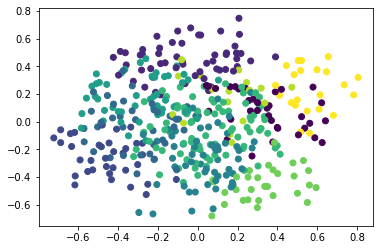

In [20]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['spec_3'])

- n_init = 10 일 때

In [21]:
spectral_labels_10 = SpectralClustering(n_clusters=10, n_init=10).fit_predict(data)
df['spec_10'] = spectral_labels_10

In [22]:
score_samples = silhouette_samples(data, df['spec_10'])
df['sil_score_10']=score_samples

print()

average_score = silhouette_score(data, df['spec_10'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.219


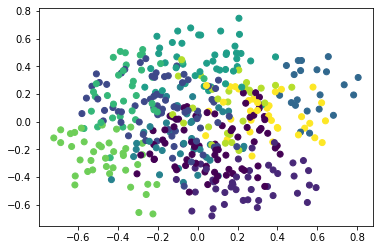

In [23]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['spec_10'])

- n_init = 100

In [24]:
spectral_labels_100 = SpectralClustering(n_clusters=10, n_init=100).fit_predict(data)
df['spec_100'] = spectral_labels_100

In [25]:
score_samples = silhouette_samples(data, df['spec_100'])
df['sil_score_100']=score_samples

print()

average_score = silhouette_score(data, df['spec_100'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.221


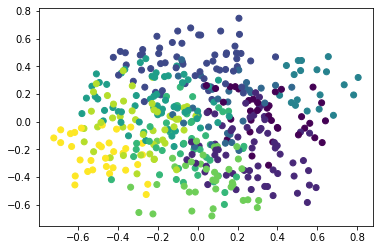

In [26]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['spec_100'])

- n_init = 500

In [27]:
spectral_labels_500 = SpectralClustering(n_clusters=10, n_init=500).fit_predict(data)
df['spec_500'] = spectral_labels_500

In [28]:
score_samples = silhouette_samples(data, df['spec_500'])
df['sil_score_500']=score_samples

print()

average_score = silhouette_score(data, df['spec_500'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.221


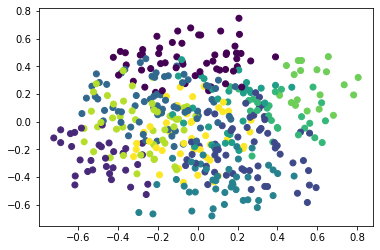

In [29]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['spec_500'])

- n_init = 1000

In [30]:
spectral_labels_1000 = SpectralClustering(n_clusters=10, n_init=1000).fit_predict(data)
df['spec_1000'] = spectral_labels_1000

In [31]:
score_samples = silhouette_samples(data, df['spec_1000'])
df['sil_score_1000']=score_samples

print()

average_score = silhouette_score(data, df['spec_1000'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.222


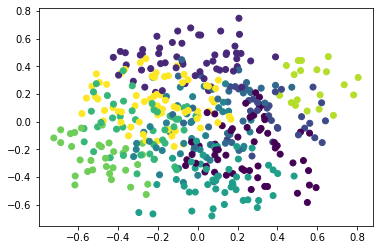

In [32]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['spec_1000'])

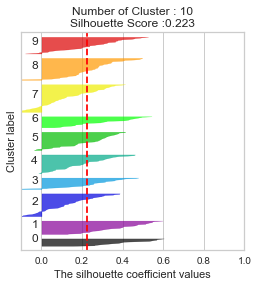

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

X_features = df[['A','B','C','D']].values
cluster = SpectralClustering(n_clusters=10, n_init=100, random_state=0)
cluster_labels = cluster.fit_predict(data)
sil_avg = silhouette_score(X_features,cluster_labels)
sil_values = silhouette_samples(X_features,cluster_labels)

y_lower = 10
fig, axs = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)

axs.set_title('Number of Cluster : '+ str(10)+'\n' \
                  'Silhouette Score :' + str(round(sil_avg,3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
axs.set_ylim([0, len(X_features) + (10 + 1) * 10])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(10):
    ith_cluster_sil_values = sil_values[cluster_labels==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs.axvline(x=sil_avg, color="red", linestyle="--")